In [23]:
import xarray
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'
import pandas as pd
from osgeo import gdal
from osgeo import osr
from pprint import pprint

In [17]:



xds = xarray.open_dataarray('D:\Becode_Bouman3.31\BXL-Bouman-3.31-main\content\\3.data_tools\data_visualization\\3D_house\DSM\DHMVIIDSMRAS1m_k01\GeoTIFF\DHMVIIDSMRAS1m_k01.tif')

# xds.plot()
# xds.shape
xds

<xarray.DataArray 'band_data' (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 ...
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194

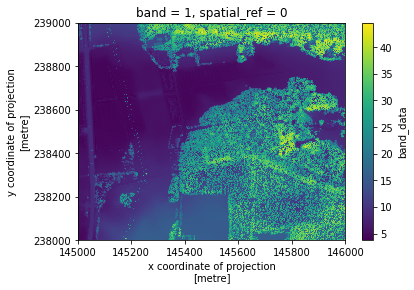

In [18]:

xdsc = xds.rio.clip_box(
    minx=145000,
    miny=238000,
    maxx=146000,
    maxy=239000,

)

xdsc
xdsc.plot()

In [19]:
m = xdsc.values
p = m.squeeze()
mn = pd.DataFrame(p)

fig = go.Figure(data=[go.Surface(z=p)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title="TEST", autosize= True,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
                  )
fig.show()


In [24]:
# To get the coordinates of the corners of your geotiff do the following
img = 'D:\Becode_Bouman3.31\BXL-Bouman-3.31-main\content\\3.data_tools\data_visualization\\3D_house\DSM\DHMVIIDSMRAS1m_k01\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
ds = gdal.Open(img)
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5]
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

print (width, height, minx, miny, maxx, maxy)
info = gdal.Info(ds)
pprint (info)

17000 9000 145000.0 238000.0 162000.0 247000.0
('Driver: GTiff/GeoTIFF\n'
 'Files: '
 'D:\\Becode_Bouman3.31\\BXL-Bouman-3.31-main\\content\\3.data_tools\\data_visualization\\3D_house\\DSM\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif\n'
 'Size is 17000, 9000\n'
 'Coordinate System is:\n'
 'PROJCRS["Belge 1972 / Belgian Lambert 72",\n'
 '    BASEGEOGCRS["Belge 1972",\n'
 '        DATUM["Reseau National Belge 1972",\n'
 '            ELLIPSOID["International 1924",6378388,297,\n'
 '                LENGTHUNIT["metre",1]]],\n'
 '        PRIMEM["Greenwich",0,\n'
 '            ANGLEUNIT["degree",0.0174532925199433]],\n'
 '        ID["EPSG",4313]],\n'
 '    CONVERSION["Belgian Lambert 72",\n'
 '        METHOD["Lambert Conic Conformal (2SP)",\n'
 '            ID["EPSG",9802]],\n'
 '        PARAMETER["Latitude of false origin",90,\n'
 '            ANGLEUNIT["degree",0.0174532925199433],\n'
 '            ID["EPSG",8821]],\n'
 '        PARAMETER["Longitude of false origin",4.36748666666667

In [21]:
ds.GetGCPSpatialRef()
img.GetFileMetadata()

AttributeError: 'str' object has no attribute 'GetFileMetadata'

In [ ]:
src = gdal.Open(img)
ulx, xres, xskew, uly, yskew, yres  = src.GetGeoTransform()
lrx = ulx + (src.RasterXSize * xres)
lry = uly + (src.RasterYSize * yres)

# ul = Upper-Left, lr= Lower Right
ulx, uly, lrx, lry